# Logistic Regression 

In the assignment, you will use gradient ascent to find the weights for the logistic regression.   

As an example, we will use the widely-used breast cancer data set.  This data set is described here:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin


## Step 1:  Getting, preprocessing, and understanding the dataset

### Importing the standard libraries

In [45]:
# Importing important libraries
# Import breastcancer dataset
# Import preprocessing from sklearn
# Import train_test_split from sklearn
# Import numpy,math
%matplotlib inline 
import sklearn.preprocessing
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Importing the dataset

In [46]:
# Load dataset to a python variable cancer
cancer = load_breast_cancer()
print(cancer)
# cancer.DESCR
# Store target to a variable called y
# Store feature to a variable called X

y = cancer.target
X = cancer.data
# y.reshape(y.shape[0],1)

# print(y)
# print(X)



{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [47]:
# Printing the shape of data (X) and target (Y) values 
print(X.shape)
print(y.shape)

(569, 30)
(569,)


### Data Pre-Processing
#### Splitting the data into train and test before scaling the dataset


In [48]:
# Use train_test_split() function to split the dataset
# Store the return value of pervious step to X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=21)
# print(X)

# print("=======================================")
# print(X_train)

#### Scale the data since we will be using gradient ascent

In [49]:
# Find the scaler of the dataset by using preprocessing.StandardScaler().fit()

scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train_transforn = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)
# Using this scale to scale the X_train and X_test using .transform()

print( X_train_transforn )



[[ 1.53579555  0.86798336  1.51860143 ...  1.00773221 -0.55200445
  -0.44270833]
 [-0.71220728  1.15183612 -0.66288327 ...  0.21539164 -0.17594906
   0.83433947]
 [ 0.31169223 -1.50899503  0.24243496 ... -0.20300096 -0.97610216
  -0.51173795]
 ...
 [ 2.15356732 -0.50743326  2.01694174 ...  1.00006934 -0.66134214
  -1.0402459 ]
 [-0.60924532 -1.11206272 -0.59353091 ... -0.78568546 -0.26872043
  -0.06574194]
 [ 0.80934171  0.18719829  0.72125694 ... -0.10951397  0.60598109
  -1.05372825]]


In [50]:
# TODO - Print the shape of x_train and y_train 
print(X_train_transforn.shape) # It should print (426, 30)
print(y_train.shape) # It should print (426,)

(426, 30)
(426,)


#### Adding a column of ones to the  matrices $X_{train}$ and  $X_{test}$
After adding a column of ones $X_{train}=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$

Similarly for $X_{test}$

In [51]:
# Append a column of ones to x_train 
# Create a column vector of ones by using np.ones and reshape
# X_train.shape[0]

train_ones = np.ones(X_train_transforn.shape[0]).transpose()
test_ones = np.ones(X_test_transform.shape[0]).transpose()


# Append a column of ones in the beginning of x_train by using np.hstack
X_train = np.hstack([train_ones[:,None],X_train_transforn])

# print(X_train)
# print(X_test)

# Now do the same for the test data
X_test = np.hstack([test_ones[:,None],X_test_transform])


# We can check that everything worked correctly by:
# Printing out the new dimensions
print("The trainng data has dimensions: ", X_train.shape, ". The testing data has dimensions: ",X_test.shape)
# # Looking at the first two rows of X_train to check everything worked as expected
print(X_train[0:2])

The trainng data has dimensions:  (426, 31) . The testing data has dimensions:  (143, 31)
[[ 1.          1.53579555  0.86798336  1.51860143  1.47198388  0.32517161
   0.51391669  1.22141943  1.36237283  0.64826986 -0.5420035   0.77063231
   2.91022518  1.3249579   0.68333023  1.58392275  0.89370142  1.62336581
   3.91973191  0.9337271   1.06963821  0.91761181  0.72955646  1.00996575
   0.72836098 -0.32516498 -0.11765773  0.49224347  1.00773221 -0.55200445
  -0.44270833]
 [ 1.         -0.71220728  1.15183612 -0.66288327 -0.72333553  1.90108067
   0.95940798 -0.56402638 -0.10617604  1.16631026  1.63426623 -0.40653169
   1.36692606 -0.37089596 -0.44847431  2.1803592   0.54603994 -0.49019397
   1.02591588 -0.55700942  0.89308176 -0.703147    1.01561415 -0.65374586
  -0.70206247  1.89131043  0.40495381 -0.67003829  0.21539164 -0.17594906
   0.83433947]]


### Understanding the dataset

In [52]:
# Printing the names of all the features
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [53]:
# You can add your own code here to better understand the dataset


 Before writing the gradient ascent code, first write some helpful functions


 
### Sigmoid($z$)
The first function you will write is sigmoid($z$)

sigmoid($z$) takes as input a column vector of real numbers, $z^T = [z_1, z_2, ..., z_{N'}]$, where $N'$ is the number of  examples

It should produce as output a column vector $\left[\frac{1}{1+e^{-z_1}},\frac{1}{1+e^{-z_2}},...,\frac{1}{1+e^{-z_{N'}}}\right]^T$

In [54]:
# Write the sigmoid function
def sigmoid(z):
  val = 1/(1+np.exp(-z))
  return val

### Initializing ${\bf w}$
For testing the next functions, we create a coefficient vector, ${\bf w}$.
We will initialize the coeffients to be $0$, i.e. ${\bf w}^T = [0,0,\ldots ,0]$ (We could have initialized ${\bf w}$ to any values.)

In [55]:
# Initialize w using np.zeros()

w = np.zeros(X_train.shape[1])

w.shape


(31,)

### Our hypothesis, $h({\bf x})$
The next  function to write is our hypothesis function. 

For example if our design matrix $X$ consists of single example $X=[1,x_1,x_2,\ldots,x_d]$ and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, it returns $h({\bf x})=\frac{1}{1+e^{-\left({w_{0}\cdot 1 +w_1\cdot x_1+\cdots w_d\cdot x_d}\right)}}$

If given a  matrix consisting of $N'$ examples 
$X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, the function returns a column vector
$[h({\bf x}^{(1)}),h({\bf x}^{(2)},\ldots, h({\bf x}^{(N')}]^T$

In [56]:
# Predict the probability that a patient has cancer 
# Write the hypothesis function 
def hypothesis(X , w):
  z = np.dot(X,w)
  val = sigmoid(z)
  return val


### Log-Likelihood Function.
Write the code to calculate the log likelihood function $\ell({\bf w})=
\sum_{i=1}^{N'}y^{(i)}\ln(h({\bf x}^{(i)})) +(1- y^{(i)})\ln(1-h({\bf x}^{(i)}))$

The input is a matrix consisting of $N'$ examples $X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and a column vector ${\bf y}^T=[y^{(1)},y^{(2)},\dots,y^{(N')}]$ of labels for $X$.

The output is $\ell({\bf w})$

In [57]:
# Write the log likelihood function 
def log_likelihood(X , y , w ):
  L_w = np.sum((y*np.log(hypothesis(X,w))) + ((1-y)*np.log(1-hypothesis(X,w))))
  return L_w

print(w.shape)

(31,)


# Gradient Ascent
Now write the code to perform gradient ascent.  You will use the update rule from the lecture notes.

In [58]:
# TODO - Write the gradient ascent function 



# print(w.shape)
def Logistic_Regression_Gradient_Ascent(X, y, learning_rate, num_iters):
    # For every 100 iterations, store the log_likelihood for the current w
    # Initializing log_likelihood to be an empty list  
    log_likelihood_values = []
    # Initialize w to be a zero vector of shape x_train.shape[1],1
    w = np.zeros((X_train.shape[1],1))
    # w = np.zeros((31,1))
    # Initialize N to the number of training examples
    N = X_train.shape[0]
   
    for i in range(num_iters):
      # update the w using formula 
      h_X = hypothesis(X,w)
      m = 1/N * np.matmul(X.transpose(), (y - h_X))
      w = w + (m*learning_rate)
      # append the log_likelihodd values to the list for every 100 iterations
      # i = i+1
      if(i%100==0):
        log_likelihood_values.append(log_likelihood(X,y,w))
      
        
    return w, log_likelihood_values
    
# Logistic_Regression_Gradient_Ascent(X_train, y_train, learning_rate, num_iters)

### After completing the code above, run the following

In [59]:
# Set the learning_rate
learning_rate = 0.5
#threshold
threshold = 0.5
# Set the num_iters
num_iters = 5000
y_train = y_train.reshape(y_train.shape[0],1)
# X_train = X_train.reshape(X_train.shape[0],31)


# Run the Logistic_Regresion_Gradient_Ascent() and store the returned values
w, log_likelihood_values = Logistic_Regression_Gradient_Ascent(X_train, y_train, learning_rate, num_iters)
print(w)
print(log_likelihood_values)

[[-1.44505967]
 [ 0.67149855]
 [ 0.17484065]
 [ 0.62275669]
 [ 0.17935684]
 [ 0.38449167]
 [ 2.16375699]
 [-2.33221554]
 [-2.07526642]
 [ 0.55878766]
 [-0.32002182]
 [-2.99516527]
 [ 0.18140869]
 [-1.66508898]
 [-2.6121377 ]
 [ 1.03390255]
 [ 0.76047738]
 [ 0.82413256]
 [ 0.13569754]
 [-0.5811701 ]
 [ 1.6989062 ]
 [-2.20251072]
 [-2.2756885 ]
 [-1.63846581]
 [-2.36077475]
 [-1.74475753]
 [ 0.85257931]
 [-1.91022117]
 [-1.83555381]
 [-0.65271077]
 [-1.75348027]]
[-100.17374556622079, -31.8020784956936, -28.391443830671506, -26.745549378937707, -25.68493683136804, -24.90682037985577, -24.294819604841358, -23.792777436788853, -23.36884847842877, -23.002885890222796, -22.68133872311396, -22.394782431785448, -22.136485238227884, -21.90150248682932, -21.68609813595512, -21.48737525186184, -21.3030369400663, -21.131227776022428, -20.970425438953125, -20.819364428274078, -20.6769809038743, -20.542371857528053, -20.414764278315687, -20.29349145909901, -20.177974514773886, -20.067707774990808, -

# Plotting Likelihood v/s Number of Iterations.

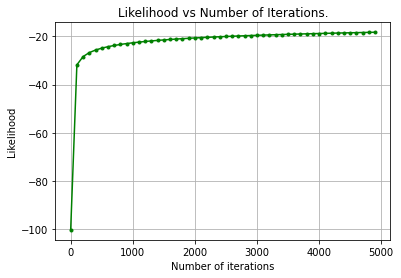

In [60]:
# Run this cell to plot Likelihood v/s Number of Iterations.
def plot_ll_values():
  iters = np.array(range(0,num_iters,100))
  plt.plot(iters,log_likelihood_values,'.-',color='green')
  plt.xlabel('Number of iterations')
  plt.ylabel('Likelihood')
  plt.title("Likelihood vs Number of Iterations.")
  plt.grid()
plot_ll_values()

#  Evaluating your model

In [61]:
# use hypothesis(...) to predict.
def pred(w):
  pred_1 = hypothesis(X_test,w)
  pred_2 = pred_1.reshape((pred_1.shape[0]))
  after_threshold = (pred_2 >= threshold).astype(int)

pred(w)

In [62]:
def confusion_matrix(y_true,y_pred):
  TP=0
  FP=0
  FN=0
  TN=0
  for i in range(y_test.shape[0]):
      # count TP,FP,FN,FP
      TP = sum((y_true==1)&(y_pred==1))
      FP = sum((y_true==0)&(y_pred==1))
      FN = sum((y_true==1)&(y_pred==0))
      TN = sum((y_true==0)&(y_pred==0))
      # i = i + 1
          
  # calculate precision, recall and f1
  precision = TP/(TP + FP)
  recall = TP/(TP + FN)
  f1 = (2*precision*recall) / (precision + recall)


  print("Precision: ",precision)
  print("Recall: ",recall)
  print("F1: ",f1)
  print("Confusion Matrix: ")
  print("TP: ",TP," FN: ",FN," FP: ",FP," TN: ",TN)

In [63]:
confusion_matrix(y_test,after_threshold)

Precision:  0.968421052631579
Recall:  0.989247311827957
F1:  0.9787234042553192
Confusion Matrix: 
TP:  92  FN:  1  FP:  3  TN:  47


Precision:  0.968421052631579
Recall:  0.989247311827957
F1:  0.9787234042553192
Confusion Matrix: 
TP:  92  FN:  1  FP:  3  TN:  47
/n


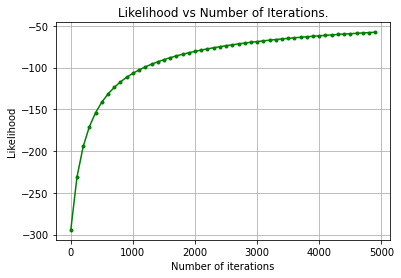

In [68]:
#Using the test set as a validation set and trying differet setting of the hyperparameters
learning_rate = 0.001
threshold = 0.5
num_iters = 5000
y_train = y_train.reshape(y_train.shape[0],1)
w, log_likelihood_values = Logistic_Regression_Gradient_Ascent(X_train, y_train, learning_rate, num_iters)

pred(w)
confusion_matrix(y_test,after_threshold)
print("/n")
plot_ll_values()



Precision:  0.968421052631579
Recall:  0.989247311827957
F1:  0.9787234042553192
Confusion Matrix: 
TP:  92  FN:  1  FP:  3  TN:  47
/n


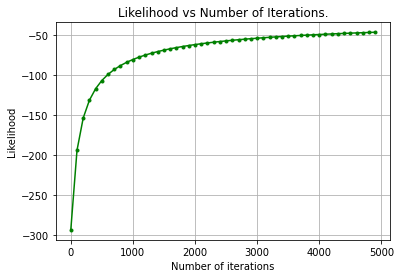

In [69]:
#Using the test set as a validation set and trying differet setting of the hyperparameters
learning_rate = 0.002
threshold = 0.5
num_iters = 5000
y_train = y_train.reshape(y_train.shape[0],1)
w, log_likelihood_values = Logistic_Regression_Gradient_Ascent(X_train, y_train, learning_rate, num_iters)

pred(w)
confusion_matrix(y_test,after_threshold)
print("/n")
plot_ll_values()